In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the file
data= pd.read_csv('emails.csv')

In [3]:
data

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\r\nThe following champagne is avail...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\r\n\r\nPlease note t...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\r\n\r\nWeather Group\r\n\r...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [4]:
list(data)

['Unnamed: 0', 'filename', 'Message-ID', 'content', 'Class']

In [5]:
data.shape

(48076, 5)

In [6]:
data.nunique()

Unnamed: 0    48076
filename      48076
Message-ID    48076
content       24656
Class             2
dtype: int64

In [7]:
data.dtypes

Unnamed: 0     int64
filename      object
Message-ID    object
content       object
Class         object
dtype: object

In [8]:
data.isnull().sum()

Unnamed: 0    0
filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


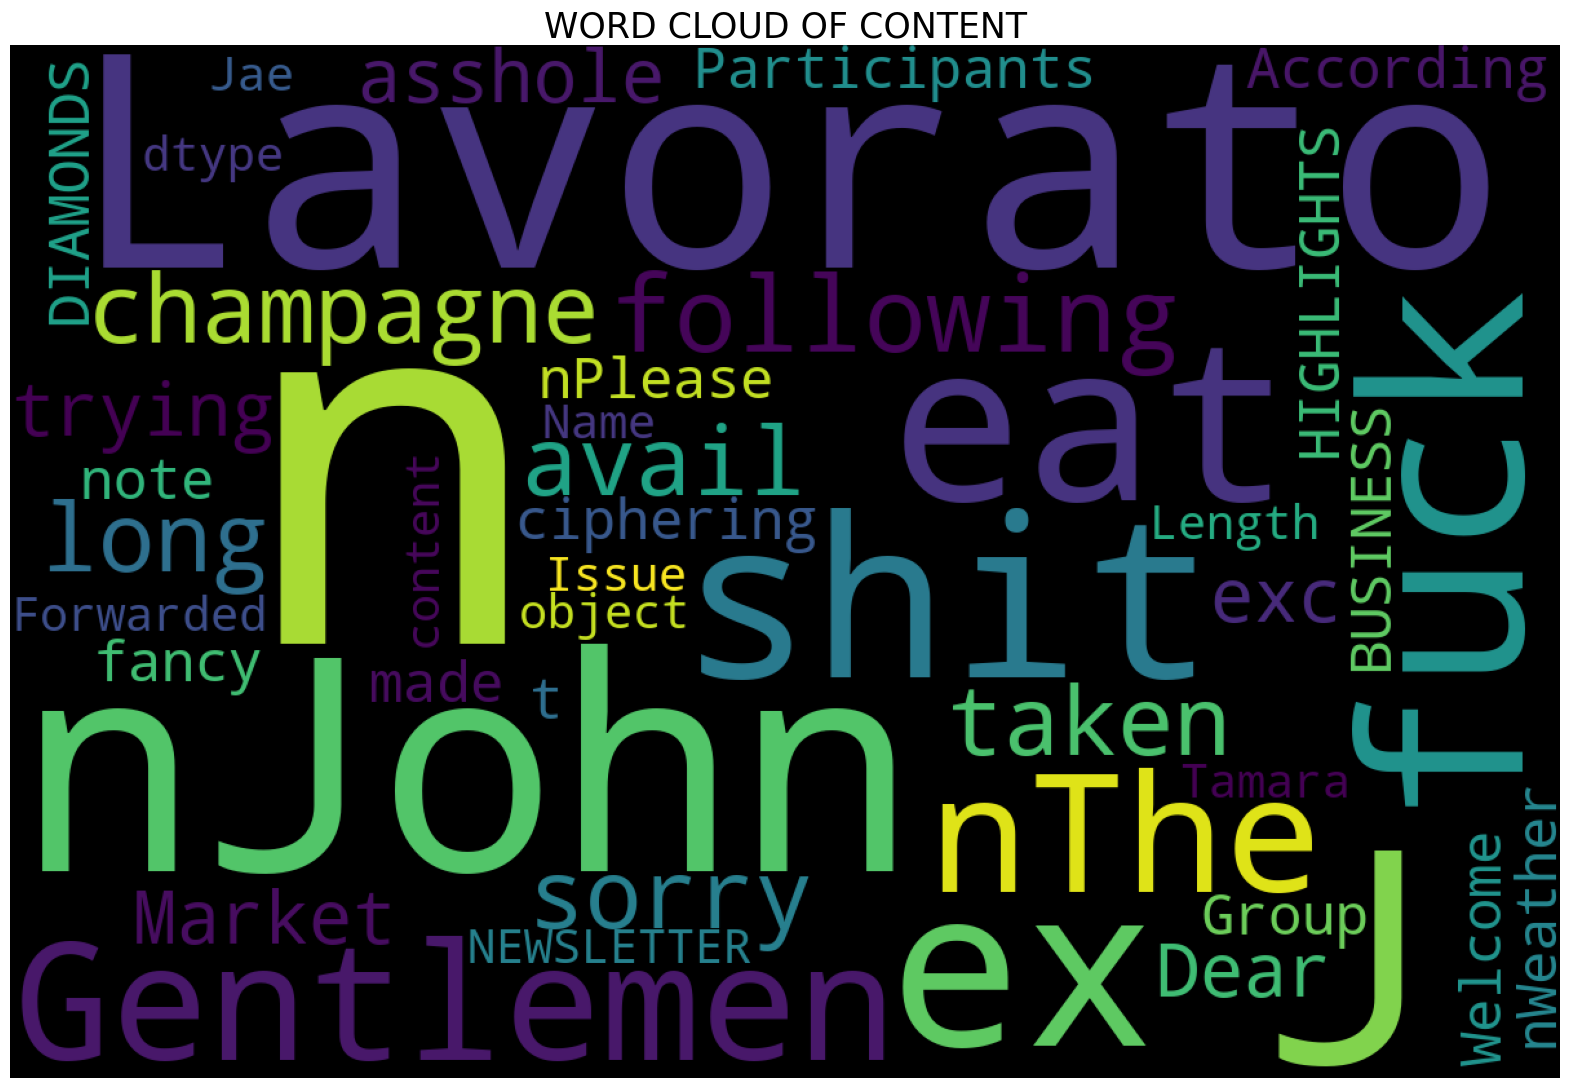

In [11]:
# let's see the words cloud for content 

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(data['content']))

plt.rcParams['figure.figsize'] = (20, 20)
plt.title('WORD CLOUD OF CONTENT', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [12]:
class_counts = data['Class'].value_counts()
print(class_counts)

Class
Non Abusive    44666
Abusive         3410
Name: count, dtype: int64


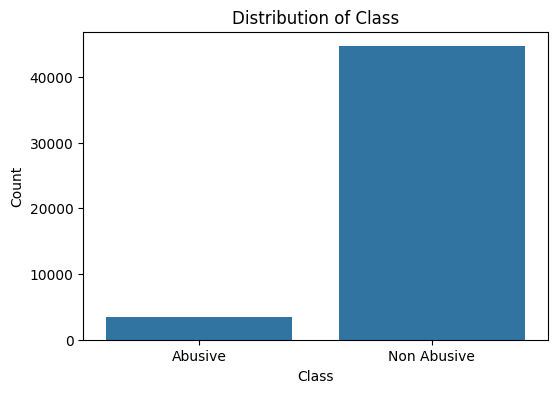

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

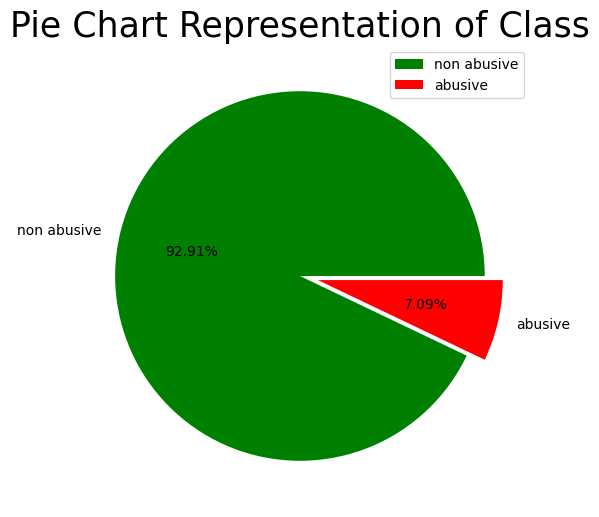

In [14]:
# a pie chart to represent the abusive and non abusive class

size = [44666, 3410]
colors = ['green', 'red']
labels = "non abusive","abusive"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Class', fontsize = 25)
plt.legend()
plt.show()

In [15]:
df = data[data['Class'] == 'Abusive']

In [16]:
df

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\r\nThe following champagne is avail...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive
...,...,...,...,...,...
3405,3405,zipper-a/sent_items/367.,<14695903.1075861170942.JavaMail.evans@thyme>,There is a lot of confused bullshit floating a...,Abusive
3406,3406,zipper-a/sent_items/37.,<6945064.1075842017346.JavaMail.evans@thyme>,"wow, three weeks away from the kids ! brave an...",Abusive
3407,3407,zipper-a/sent_items/382.,<1237276.1075861171270.JavaMail.evans@thyme>,\r\ngot this from late friday. have you ever h...,Abusive
3408,3408,zufferli-j/deleted_items/109.,<30324039.1075842024203.JavaMail.evans@thyme>,\r\n\r\n -----Original Message-----\r\nFrom: \...,Abusive


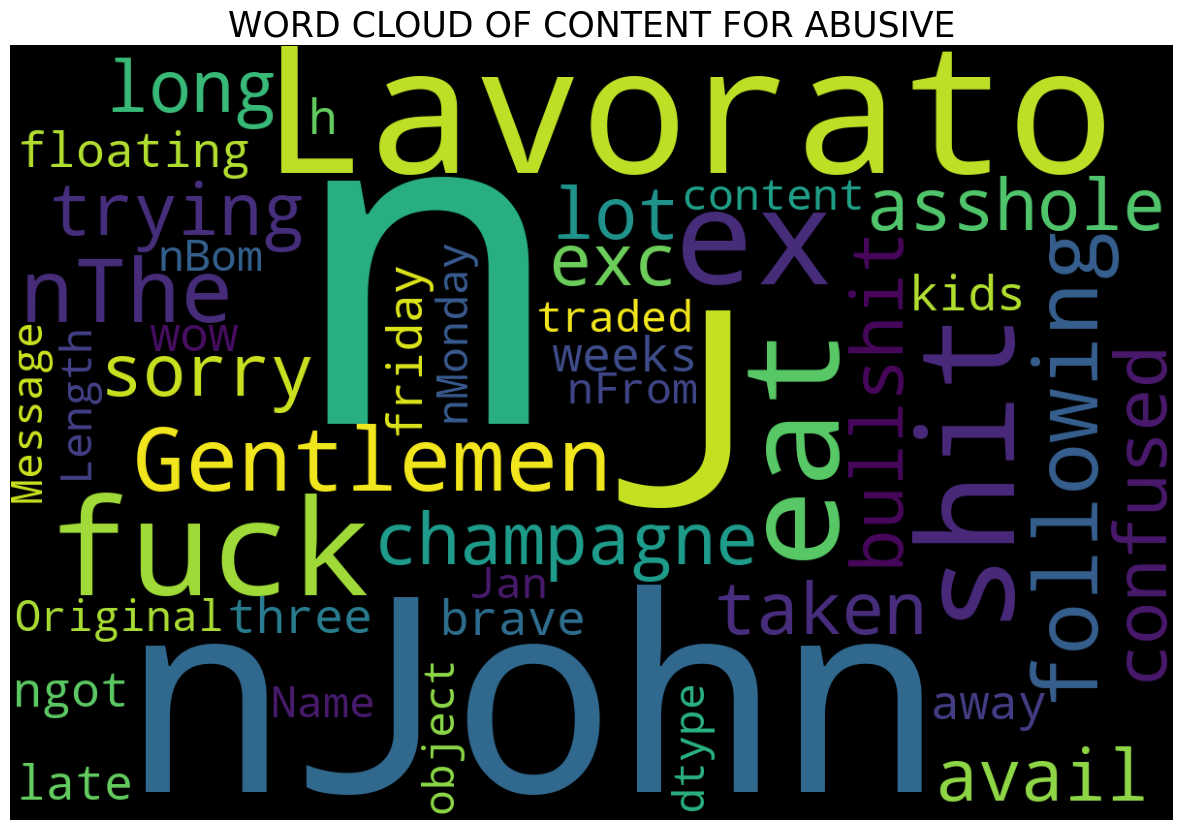

In [17]:
# let's see the words cloud for content for class of abusive

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(df['content']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF CONTENT FOR ABUSIVE', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [18]:
df1 = data[data['Class'] == 'Non Abusive']
df1

,Unnamed: 0,filename,Message-ID,content,Class
3410,3410,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,Here is our forecast\r\n\r\n,Non Abusive
3411,3411,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,Traveling to have a business meeting takes the...,Non Abusive
3412,3412,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,test successful. way to go!!!,Non Abusive
3413,3413,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Randy,\r\n\r\n Can you send me a schedule of t...",Non Abusive
3414,3414,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\r\n\r\nPlease note t...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\r\n\r\nWeather Group\r\n\r...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


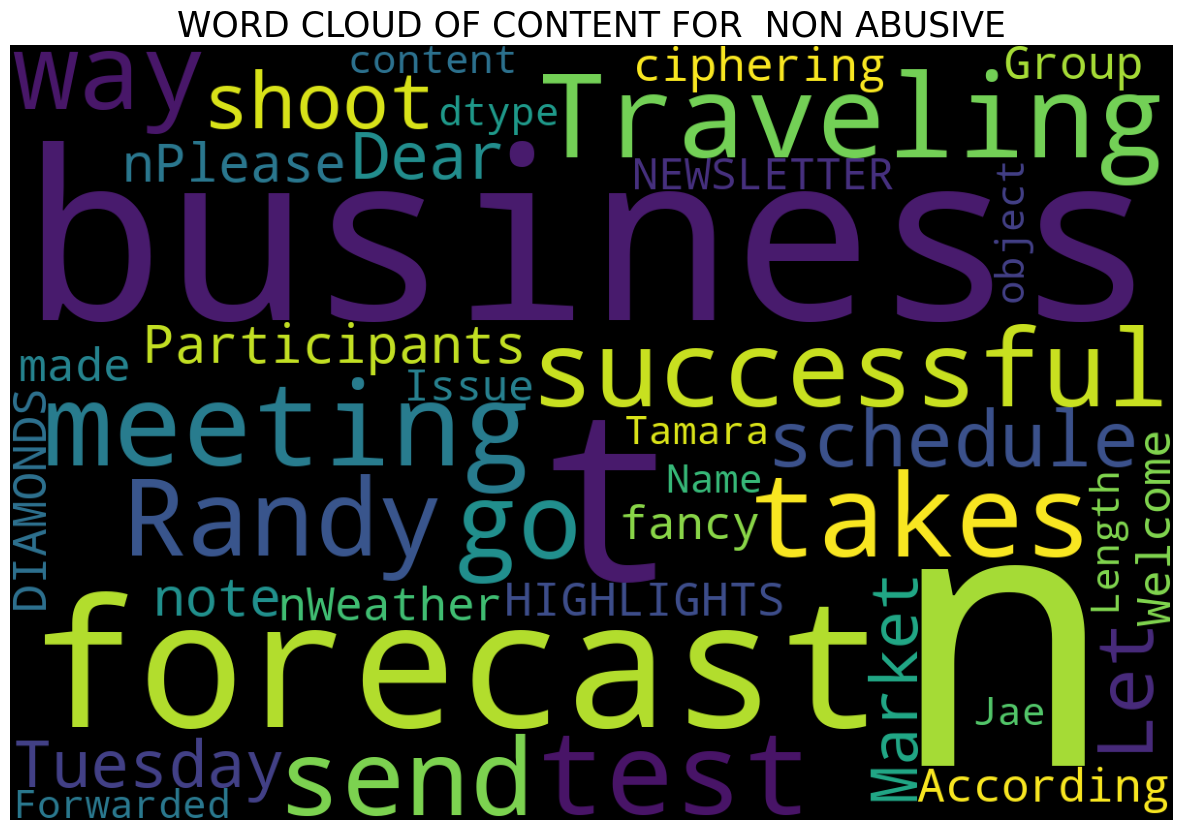

In [19]:
# let's see the words cloud for content for class of non abusive

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(df1['content']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF CONTENT FOR  NON ABUSIVE', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

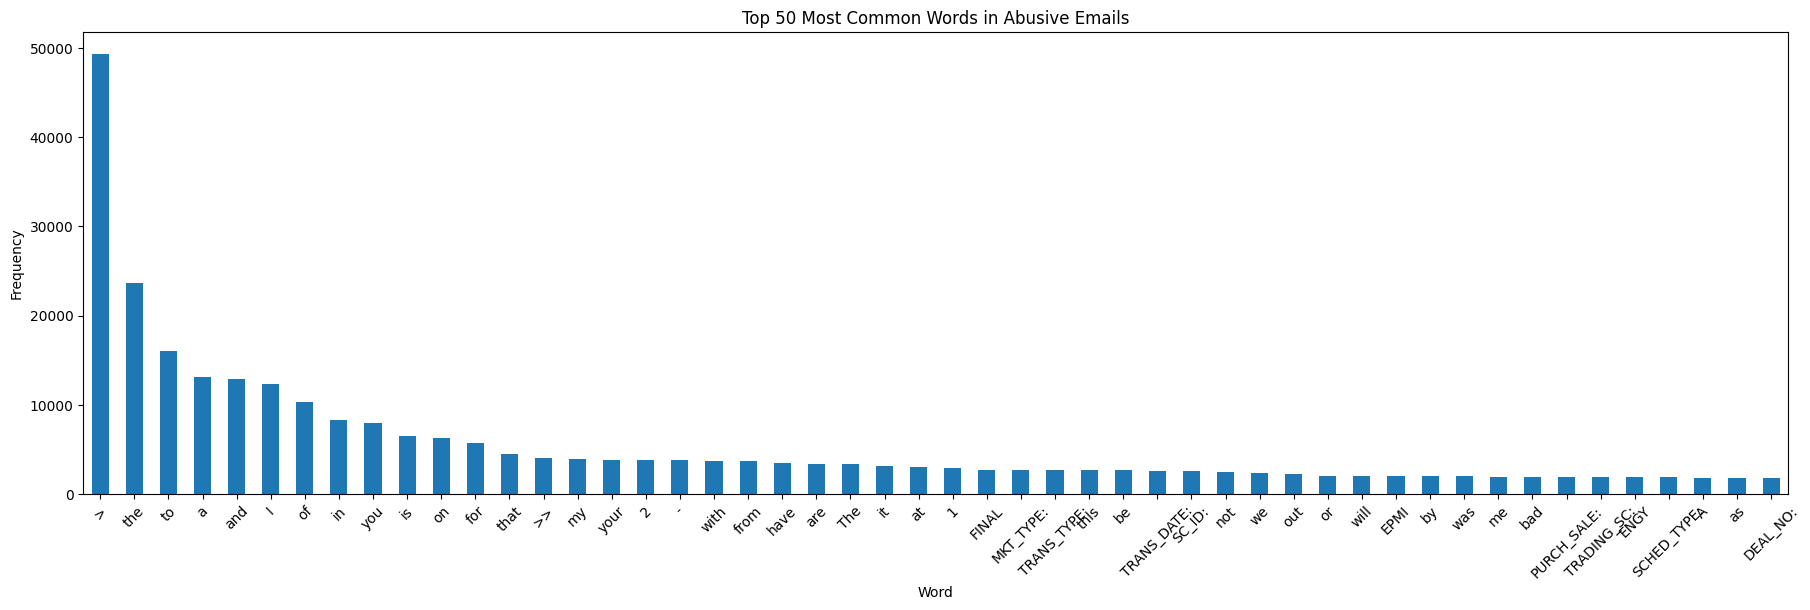

In [20]:
# Most common words in abusive emails
abusive_emails = data[data['Class'] == 'Abusive']
abusive_words = ' '.join(abusive_emails['content']).split()
abusive_word_freq = pd.Series(abusive_words).value_counts()
plt.figure(figsize=(22, 6))
abusive_word_freq[:50].plot(kind='bar')
plt.title('Top 50 Most Common Words in Abusive Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

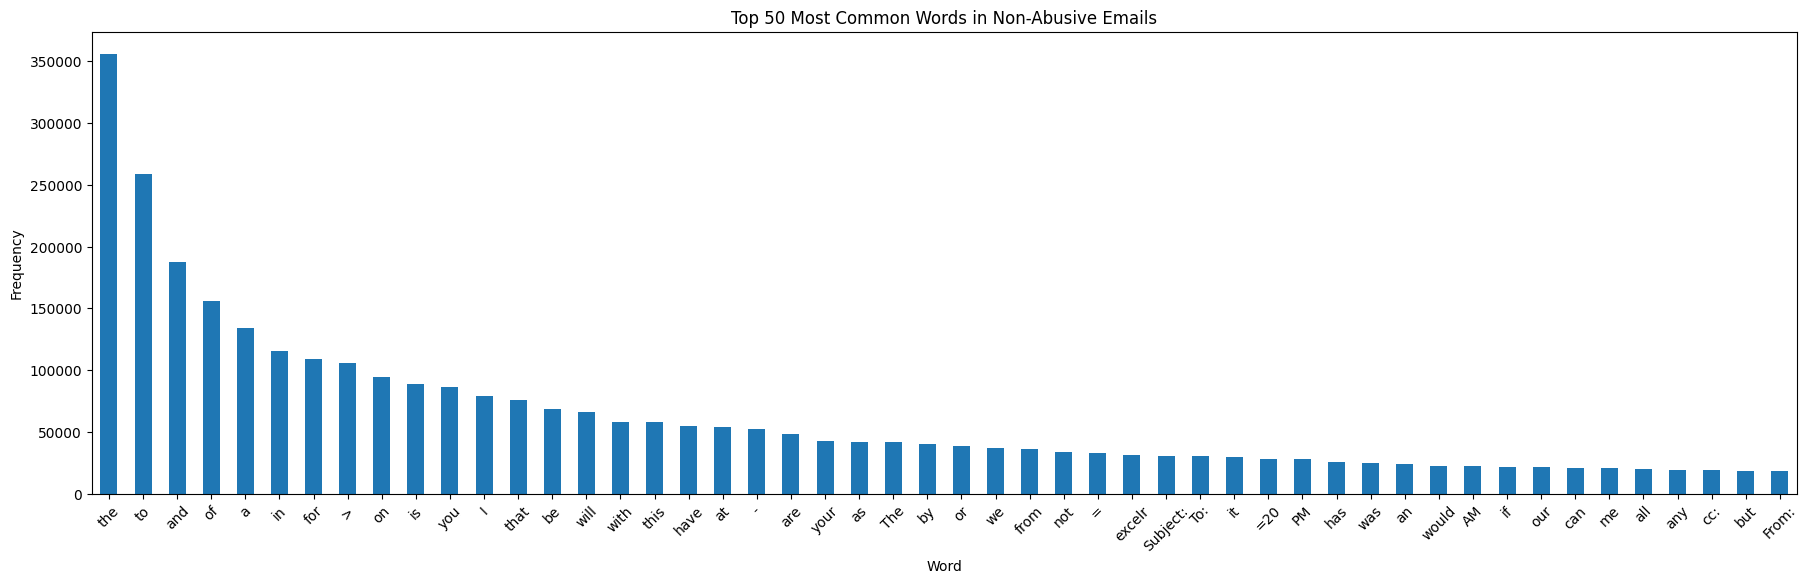

In [21]:
# Most common words in non-abusive emails
non_abusive_emails = data[data['Class'] == 'Non Abusive']
non_abusive_words = ' '.join(non_abusive_emails['content']).split()
non_abusive_word_freq = pd.Series(non_abusive_words).value_counts()
plt.figure(figsize=(22, 6))
non_abusive_word_freq[:50].plot(kind='bar')
plt.title('Top 50 Most Common Words in Non-Abusive Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [22]:
new = data.drop(['Unnamed: 0','filename', 'Message-ID' ],axis = 1)

In [23]:
new

,content,Class
0,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive
1,fuck you,Abusive
2,Gentlemen:\r\nThe following champagne is avail...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive
...,...,...
48071,"Dear Market Participants,\r\n\r\nPlease note t...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\r\n\r\nWeather Group\r\n\r...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [24]:
new['content'][0]

'eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n11/18/2000 01:01 PM\r\nTo: John Arnold/HOU/ECT@ECT\r\ncc:  \r\nSubject: \r\n\r\nFootball bets 200 each\r\n\r\nMinn -9.5\r\nBuff +2.5\r\nPhil -7\r\nIndi -4.5\r\nCinnci +7\r\nDet +6\r\nclev +16\r\nDen +9.5\r\nDall +7.5\r\nJack +3.5\r\n\r\n\r\n'

In [25]:
new['content'][4]

"asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n12/23/2000 10:51 AM\r\nTo: John Arnold/HOU/ECT@ECT\r\ncc:  \r\nSubject: \r\n\r\njohn\r\n\r\n\r\nI cant' seem to make my gambling problem go away.\r\n\r\nbills +3 250\r\ndenver -7 250\r\njack +3 1/2 250\r\n\r\n\r\n"

In [26]:
for i, col in enumerate(new.columns):
    if new[col].dtype == 'object':  # Check if column data type is string
        new.iloc[:, i] = new.iloc[:, i].str.replace('""', '')
    else:
        new.iloc[:, i] = new.iloc[:, i].astype(str).str.replace('""', '')


In [27]:
new

,content,Class
0,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive
1,fuck you,Abusive
2,Gentlemen:\r\nThe following champagne is avail...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive
...,...,...
48071,"Dear Market Participants,\r\n\r\nPlease note t...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\r\n\r\nWeather Group\r\n\r...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [29]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MrGoku\AppData\Roaming\nltk_data...


In [31]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [32]:
nltk.download('omw-1.4')
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MrGoku\AppData\Roaming\nltk_data...


sportingly
very
troubled


In [33]:
from bs4 import BeautifulSoup
import re
import string

In [34]:
def content_to_words(raw_content):
    # delete html 
    content_text = BeautifulSoup(raw_content,'html.parser').get_text()
    # make a space
    latters_only = re.sub('[^a-zA-Z]', ' ',content_text)
    # lower letters
    words = latters_only.lower().split()
    # stop words
    meaningful_words = [w for w in words if not w in stop]
    # lemmitization
    lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    #space join words
    return(' '.join(lemmatize_words))

In [35]:
new['content_clean']=new['content'].apply(content_to_words)

In [36]:
new.head()

,content,Class,content_clean
0,eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@ex...,Abusive,eat shit john j lavorato excelr pm john arnold...
1,fuck you,Abusive,fuck
2,Gentlemen:\r\nThe following champagne is avail...,Abusive,gentleman following champagne available approx...
3,sorry i've taken so long...just been trying to...,Abusive,sorry taken long trying fend chick life sooooo...
4,asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@exc...,Abusive,asshole john j lavorato excelr john arnold hou...


In [37]:
new.tail()

,content,Class,content_clean
48071,"Dear Market Participants,\r\n\r\nPlease note t...",Non Abusive,dear market participant please note change pla...
48072,"According to my fancy ciphering we made $310,0...",Non Abusive,according fancy ciphering made month november ...
48073,BUSINESS HIGHLIGHTS\r\n\r\nWeather Group\r\n\r...,Non Abusive,business highlight weather group let give big ...
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive,welcome diamond newsletter issue special holid...
48075,---------------------- Forwarded by Tamara Jae...,Non Abusive,forwarded tamara jae black hou ect pm nicki da...


In [38]:
df2 = new[new['Class'] == 'Abusive']

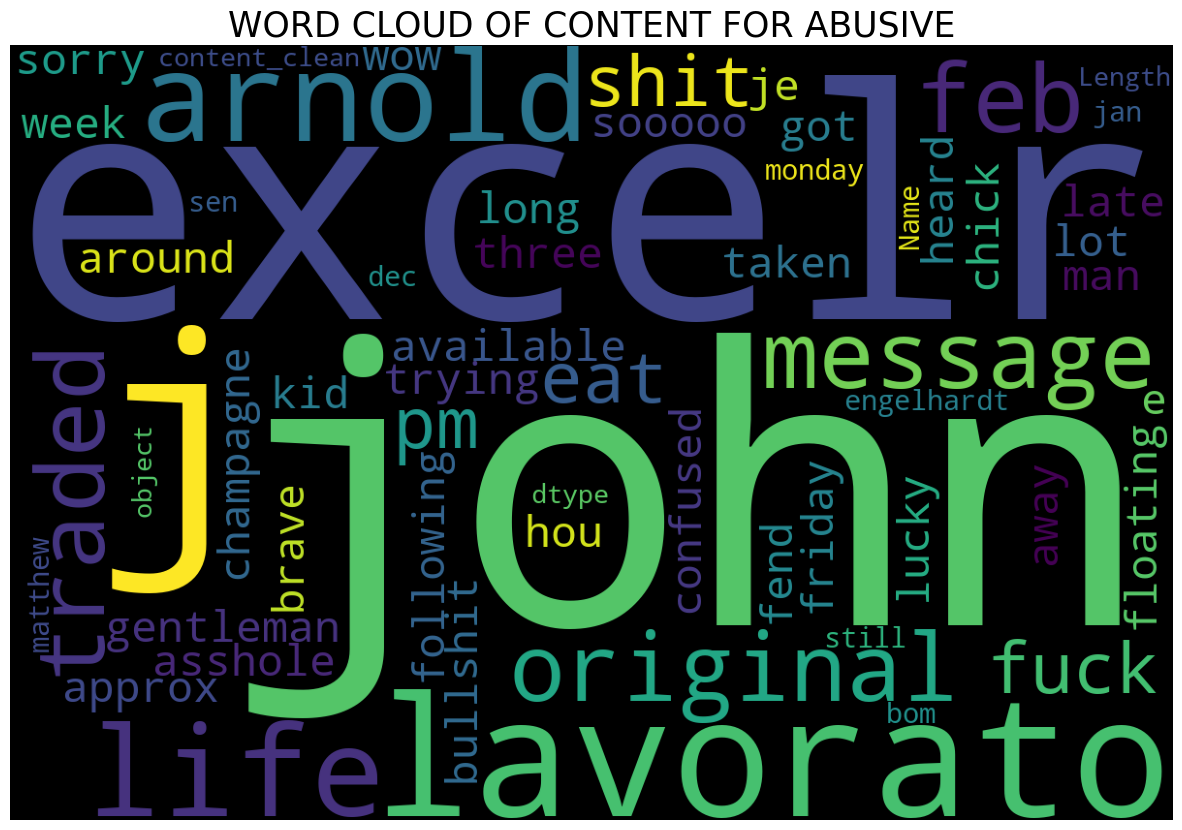

In [39]:
# let's see the words cloud for content for class of abusive

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(df2['content_clean']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF CONTENT FOR ABUSIVE', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [40]:
df3 = new[new['Class'] == 'Non Abusive']

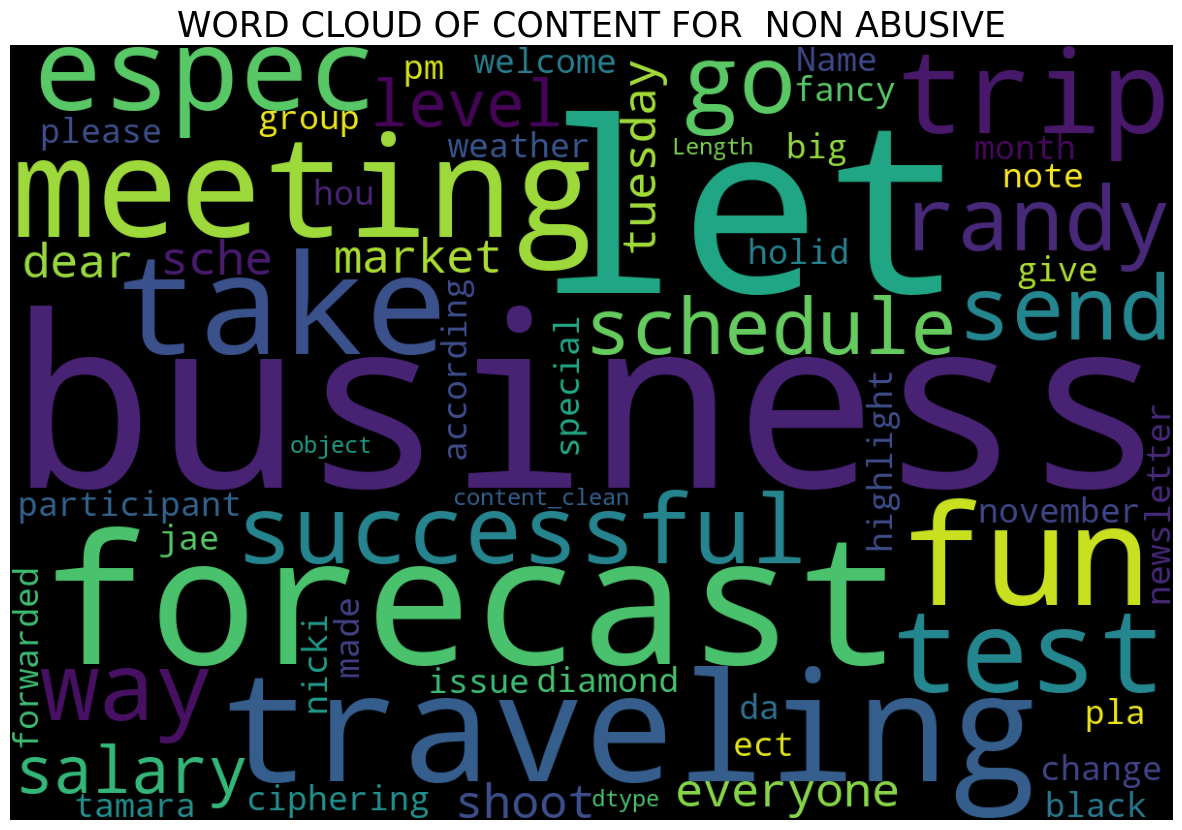

In [41]:
# let's see the words cloud for content for class of non abusive

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(df3['content_clean']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF CONTENT FOR  NON ABUSIVE', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Creating Features and Target Variable

In [42]:
X = new['content']
y = new['Class']

In [43]:
# stratify the proportions of all categories are maintained in both train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state=0)

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Bag of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

# Machine Learning Models

# Naive Bayes

accuracy:   0.97109
Confusion matrix, without normalization


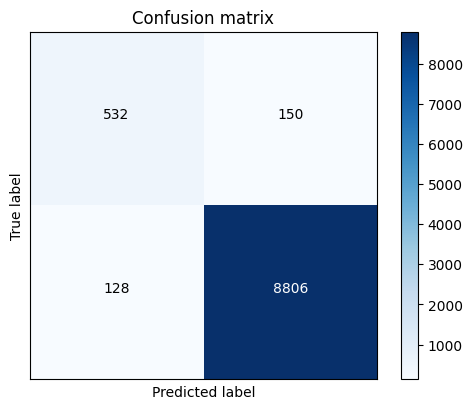

In [46]:
from sklearn.naive_bayes import MultinomialNB 
import itertools 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.5f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Abusive','Non Abusive'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=[])


# Passive Aggressive Classifier

accuracy:   0.99553
Confusion matrix, without normalization


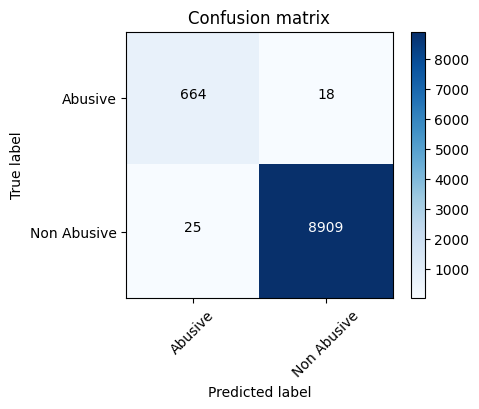

In [47]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.5f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Abusive','Non Abusive'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Abusive','Non Abusive'])

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

# Machine Learning Models

# Naive Bayes

accuracy:   0.93480
Confusion matrix, without normalization


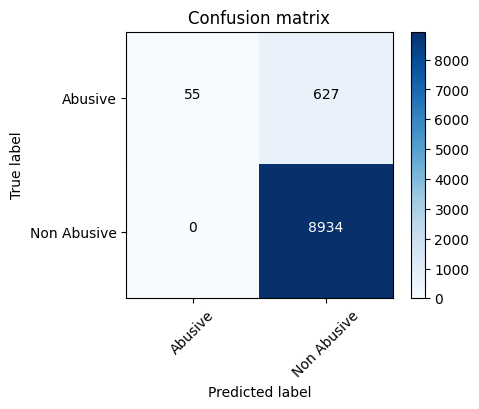

In [49]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.5f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Abusive','Non Abusive'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Abusive','Non Abusive'])

# TFIDF

accuracy:   0.99657
Confusion matrix, without normalization


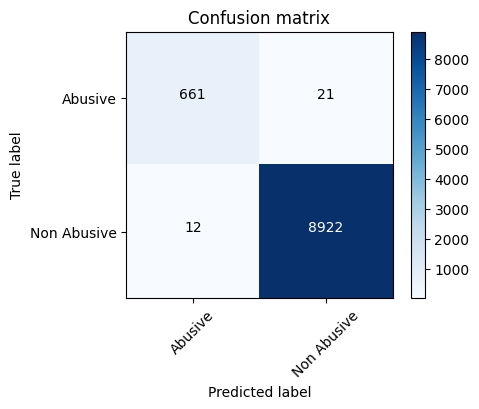

In [50]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.5f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Abusive','Non Abusive'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Abusive','Non Abusive'])

# TFIDF: Bigrams

In [51]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.99698
Confusion matrix, without normalization


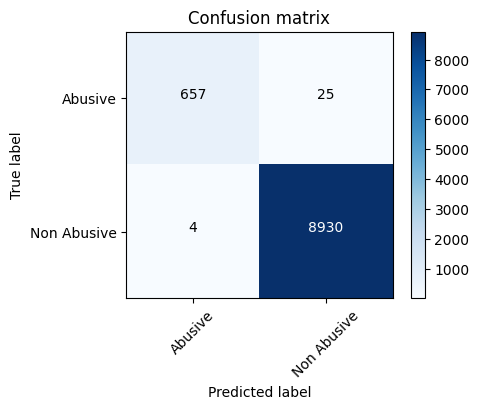

In [52]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.5f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Abusive','Non Abusive'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Abusive','Non Abusive'])

# TFIDF : Trigrams

accuracy:   0.99678
Confusion matrix, without normalization


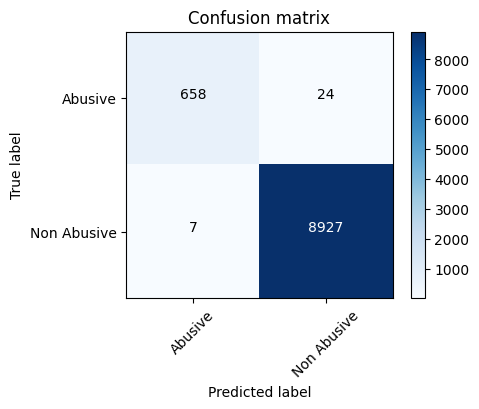

In [53]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.5f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Abusive','Non Abusive'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Abusive','Non Abusive'])